In [1]:
import numpy as np
from scipy.fftpack import fft,ifft
import matplotlib.pyplot as plt
import copy
import csv
import pandas as pd
import os

In [2]:
#x軸，所有資料共用
x=np.linspace(0,1,1400)


In [3]:
#設定需要取樣的訊號，頻率分量只使用200
y=7*np.sin(2*np.pi*200*x) 


In [4]:
#製作異常，取3個10區間的內容，加倍
for i in range(100,110):
    y[i]=2*y[i]
for i in range(1000,1010):
    y[i]=2*y[i]
for i in range(500,510):
    y[i]=2*y[i]


Text(0.5, 1.0, 'error data ')

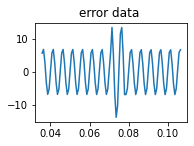

In [5]:
plt.subplot(221)
plt.plot(x[50:150],y[50:150]) 
plt.title('error data ')

Text(0.5, 1.0, 'fft of errors data')

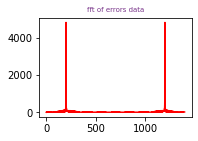

In [6]:
#將有異常的資料丟入，測試
yy=fft(y) #快速傅立葉變換
ya=abs(yy)
xf = np.arange(len(yy))
plt.subplot(222)
plt.plot(xf,ya,'r')
plt.title('fft of errors data',fontsize=7,color='#7A378B')


C:\Users\Irene\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 1.0, 'ifft of errors fft')

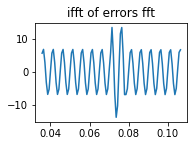

In [7]:
#逆向ifft
z=ifft(yy)
plt.subplot(221)
plt.plot(x[50:150],z[50:150]) 
plt.title('ifft of errors fft')

In [8]:
#使用3sigma，找出的極端值是原始應該被作為標準答案的200,1200
mean=np.mean(ya)
std=np.std(ya)
floor=mean-3*std
upper=mean+3*std
print(f"abs,floor:{floor}，upper:{upper}")
for i in range(len(ya)):
    if ya[i]< floor or ya[i]> upper :
        print(i,ya[i])
mean=np.mean(yy)
std=np.std(yy)
floor=mean-3*std
upper=mean+3*std
print(f"not abs,floor:{floor}，upper:{upper}")
for i in range(len(yy)):
    if yy[i]< floor or yy[i]> upper :
        print(i,yy[i])

abs,floor:-534.6966696658006，upper:595.855479921839
199 605.2353798307622
200 4834.041196948557
201 810.4487405027004
1199 810.4487405027004
1200 4834.041196948557
1201 605.2353798307622
not abs,floor:(-572.6717566775578+6.496390726949487e-16j)，upper:(572.6717566775578+6.496390726949487e-16j)
200 (2090.483267593111-4358.650479415512j)
1200 (2090.483267593111+4358.650479415512j)


In [9]:
#可能是異常值數量不足?
x=np.linspace(0,1,1400)
y=7*np.sin(2*np.pi*200*x) 
#製作異常，取3個10區間的內容，加倍
for i in range(100,300):
    y[i]=2*y[i]
for i in range(1000,1200):
    y[i]=2*y[i]
for i in range(500,700):
    y[i]=2*y[i]
yy=fft(y)
ya=abs(yy)
#使用3sigma，找出的極端值是原始應該被作為標準答案的200,1200
mean=np.mean(yy)
std=np.std(yy)
floor=mean-3*std
upper=mean+3*std
print(f"not abs,floor:{floor}，upper:{upper}")
for i in range(len(ya)):
    if yy[i]< floor or yy[i]> upper :
        print(i,yy[i])
mean=np.mean(ya)
std=np.std(ya)
floor=mean-3*std
upper=mean+3*std
print(f"abs,floor:{floor}，upper:{upper}")
for i in range(len(ya)):
    if ya[i]< floor or ya[i]> upper :
        print(i,ya[i])
#結果上並沒有區別，還是在正解周圍

not abs,floor:(-839.7195171028909+0j)，upper:(839.7195171028909+0j)
200 (2855.471358689375-6141.691621045746j)
203 (-1427.9998137985558+554.1698335111478j)
1197 (-1427.9998137985558-554.1698335111478j)
1200 (2855.471358689375+6141.691621045746j)
abs,floor:-789.4700756607687，upper:871.7361463681017
197 1273.6481937944925
199 884.2519708210453
200 6773.041609817473
201 1225.6187128244096
202 882.6598193978505
203 1531.7596654118045
1197 1531.7596654118045
1198 882.6598193978505
1199 1225.6187128244096
1200 6773.041609817473
1201 884.2519708210453
1203 1273.6481937944925


In [10]:
def normalize(min,max,input):
    r=max-min
    x=input-min
    return (2*x/r)-1

In [11]:
electric = pd.read_csv("D:\\python-training\\TEPCO-Electric\\output\\2-2\\all_meter_2021-10-23.csv")
electric=electric["electric"]
electric.dropna(how="all", inplace=True)
electric.fillna(0, inplace=True)
maxe=max(electric)
mine=min(electric)
for i in range(len(electric)):
    electric[i]=normalize(mine,maxe,electric[i])

In [12]:
electricerr=copy.deepcopy(electric)
for i in range(len(electric)):
    if i <100 or (i >300 and i <500):
        electricerr[i]=2*electric[i]


Text(0.5, 1.0, 'error')

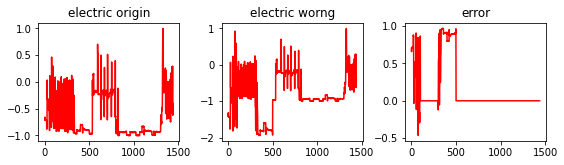

In [13]:
plt.subplot(331)
plt.plot(range(len(electric)),electric,'r')
plt.title('electric origin')
plt.subplot(332)
plt.plot(range(len(electricerr)),electricerr,'r')
plt.title('electric worng')
eleerr=copy.deepcopy(electric)
for i in range(len(eleerr)):
    eleerr[i]=eleerr[i]-electricerr[i]
plt.subplot(333)
plt.plot(range(len(eleerr)),eleerr,'r')
plt.subplots_adjust(left=0.125,
                    bottom=-0.51,
                    right=1.3,
                    top=0.88,
                    wspace=0.3,
                    hspace=0.2
                   )
plt.title('error')

In [14]:
fftele = np.fft.fft(electric)

In [15]:
ffteleerr = np.fft.fft(electricerr)

C:\Users\Irene\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\Irene\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\Irene\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 1.0, 'fft error')

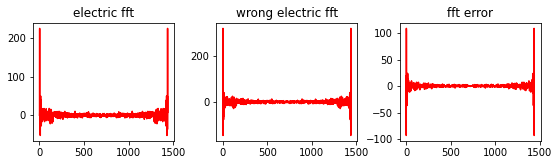

In [16]:
plt.subplot(331)
fftele[0]=0
plt.plot(range(len(fftele)),fftele,'r')
plt.title('electric fft',)
plt.subplot(332)
ffteleerr[0]=0
plt.plot(range(len(ffteleerr)),ffteleerr,'r')
plt.title('wrong electric fft',)
ferror=copy.deepcopy(fftele)
for i in range(len(ferror)):
    ferror[i]=ferror[i]-ffteleerr[i]
plt.subplot(333)

plt.plot(range(len(ferror)),ferror,'r')
plt.subplots_adjust(left=0.125,
                    bottom=-0.51,
                    right=1.3,
                    top=0.88,
                    wspace=0.3,
                    hspace=0.2
                   )
plt.title('fft error',)

Text(0.5, 1.0, 'fft error')

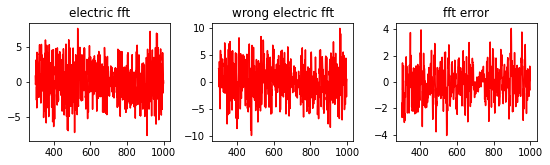

In [21]:
#比較虛數的部分
plt.subplot(331)
fftele[0]=0
plt.plot(range(300,1000),fftele.imag[300:1000],'r')
plt.title('electric fft',)
plt.subplot(332)
ffteleerr[0]=0
plt.plot(range(300,1000),ffteleerr.imag[300:1000],'r')
plt.title('wrong electric fft',)
ferror=copy.deepcopy(fftele)
for i in range(len(ferror)):
    ferror[i]=ferror[i]-ffteleerr[i]
plt.subplot(333)

plt.plot(range(300,1000),ferror.imag[300:1000],'r')
plt.subplots_adjust(left=0.125,
                    bottom=-0.51,
                    right=1.3,
                    top=0.88,
                    wspace=0.3,
                    hspace=0.2
                   )
plt.title('fft error',)

In [62]:
for i in ferror.real:
    print(i)

0.0
19.564329528640457
-93.26712163068788
109.20307892120003
105.04333679300254
-31.926639740647893
-0.5041674266718132
18.057437774100336
1.6424095688437532
24.667103278114723
-17.985395371185767
-36.50912793428199
19.528369949716893
9.68681729527043
-13.473893492664896
6.9529198559519685
-0.840097576832695
4.715402622069986
23.843822981070858
1.2391230961190391
-1.6516546944384451
12.968345449295521
1.8012787130103707
7.271519240990138
9.026883333717462
-8.83501180114392
3.5214445128376344
11.245794663084606
-2.2606279311838104
5.433934587486739
3.5900994957580625
-7.210174813268114
7.278031134789876
6.087591987345041
-9.28278980727207
-4.803769605802804
-4.550015235366104
-3.958263757294869
1.5637128117046388
-11.2341229531954
-11.302754107723871
4.89720046705683
-0.029428402853899804
-3.890867557905768
0.4196489345148011
-4.724787109657835
1.9973144601269142
6.954415112123585
-7.129316304425249
-7.1691777118528766
0.03137704020427634
-3.556712901681202
-1.8745551599304946
-4.727384